[Statsmodels](http://statsmodels.sourceforge.net/) 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


import matplotlib.pyplot as plt
%matplotlib inline

## Advertising Data

In [37]:
# read data into a DataFrame
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data = pd.read_csv('data/Advertising.csv', index_col=0)
print(data.shape)
data.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
plt.scatter?

In [ ]:
plt.scatter(data[col], data['sales'], 'o')

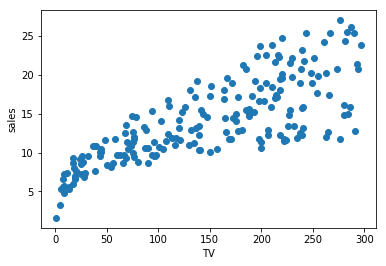

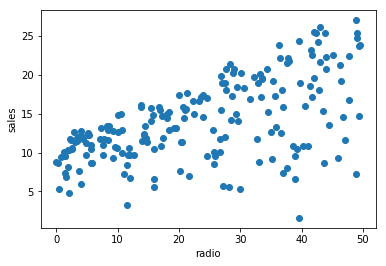

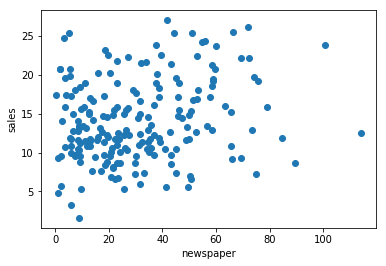

In [43]:
for col in ['TV','radio','newspaper']:
    #plt.plot(x=data[col], y=data['sales'], marker='o', color='blue')
    plt.scatter(data[col], data['sales'], marker='o')
    plt.xlabel(col)
    plt.ylabel('sales')
    plt.show()

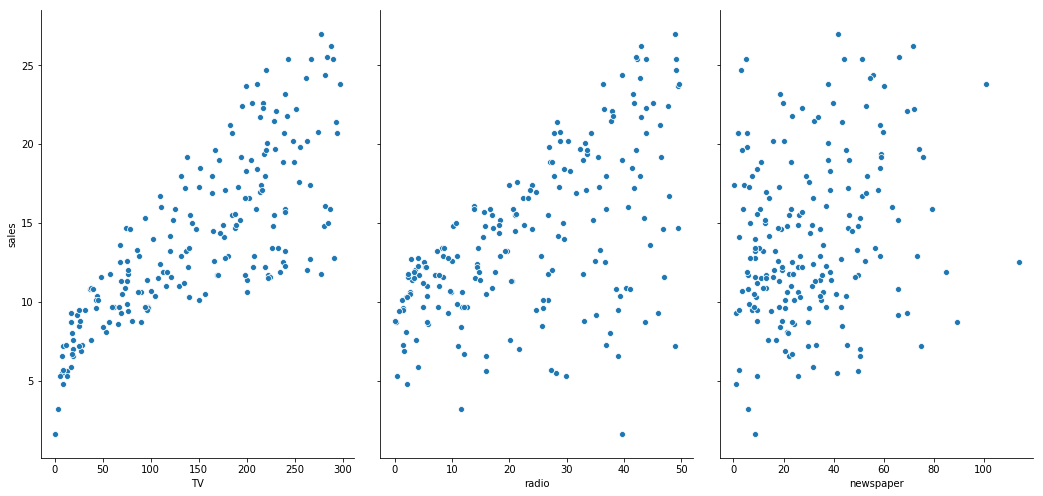

In [44]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7)

In [45]:
result = smf.ols(formula='sales ~ TV', data=data).fit()

In [46]:
result.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [47]:
residuals = np.asarray( result.resid )

In [48]:
result.mse_resid

10.618841328946221

In [49]:
result.mse_total

27.22185301507538

In [50]:
result.rsquared

0.611875050850071

In [71]:
from matplotlib import gridspec as gridspec

In [72]:
gs = gridspec.GridSpec(nrows=2, ncols=1, hspace=0, height_ratios=[4,1])

In [ ]:
plt.figure(figsize=(9,7))


In [ ]:
plt.plot(data['TV'], data['sales'], marker='o')

In [51]:
len(residuals)


200

In [77]:
fig.subplots?

<Figure size 432x288 with 0 Axes>

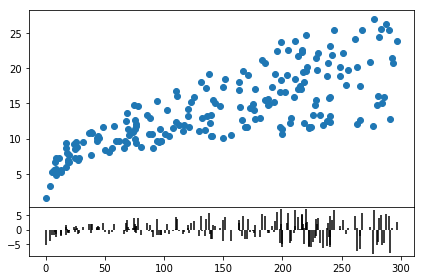

In [84]:
plt.clf()
fig, ax = plt.subplots(2,1, sharex=True, squeeze=True, gridspec_kw={'hspace':0, 'height_ratios':[4,1]})
ax[0].plot(data['TV'], data['sales'], marker='o', lw=0)
ax[1].vlines(data['TV'], 0, residuals )
ax[1].hlines(0, 0, residuals )
fig.tight_layout()
#ax[1].plot(data['TV'], residuals, marker='.')

In [12]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [8]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.0325935491276965
[0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

---

---

In [10]:
import matplotlib.pyplot as plt

7.0325935491276965
[0.04753664]


<Figure size 432x288 with 0 Axes>

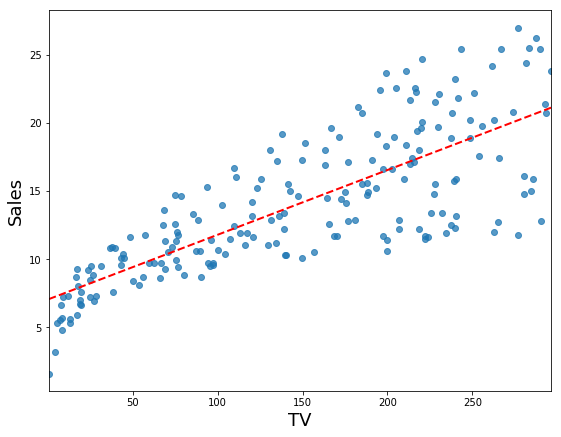

In [39]:
plt.clf()

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)


xLims = float(X.min()), float(X.max())

yint, slope = float(lm2.intercept_), float(lm2.coef_)

xarr = np.linspace(xLims[0], xLims[1], 100)
yarr = yint + slope*xarr

plt.figure(figsize=(9,7))
plt.plot(X, y, 'o', alpha=0.75)
plt.plot(xarr, yarr, '--', color='red', lw=2)
plt.xlim(xLims)
plt.xlabel('%s'%feature_cols[0], fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.show()

In [22]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


9.311638095158283
[0.20249578]


<Figure size 432x288 with 0 Axes>

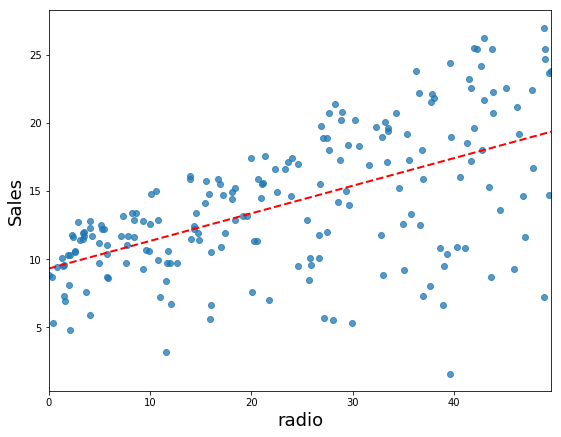

In [40]:
plt.clf()

# create X and y
feature_cols = ['radio']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)


xLims = float(X.min()), float(X.max())

yint, slope = float(lm2.intercept_), float(lm2.coef_)

xarr = np.linspace(xLims[0], xLims[1], 100)
yarr = yint + slope*xarr

plt.figure(figsize=(9,7))
plt.plot(X, y, 'o', alpha=0.75)
plt.plot(xarr, yarr, '--', color='red', lw=2)
plt.xlim(xLims)
plt.xlabel('%s'%feature_cols[0], fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.show()

12.351407069278162
[0.0546931]


<Figure size 432x288 with 0 Axes>

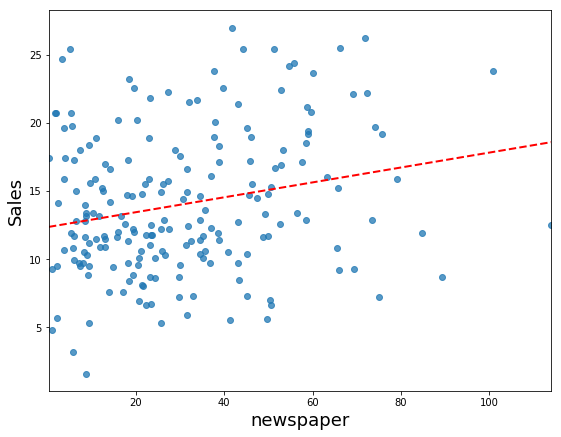

In [41]:
plt.clf()

# create X and y
feature_cols = ['newspaper']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)


xLims = float(X.min()), float(X.max())

yint, slope = float(lm2.intercept_), float(lm2.coef_)

xarr = np.linspace(xLims[0], xLims[1], 100)
yarr = yint + slope*xarr

plt.figure(figsize=(9,7))
plt.plot(X, y, 'o', alpha=0.75)
plt.plot(xarr, yarr, '--', color='red', lw=2)
plt.xlim(xLims)
plt.xlabel('%s'%feature_cols[0], fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.show()

In [13]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
6       7.2
7      11.8
8      13.2
9       4.8
10     10.6
11      8.6
12     17.4
13      9.2
14      9.7
15     19.0
16     22.4
17     12.5
18     24.4
19     11.3
20     14.6
21     18.0
22     12.5
23      5.6
24     15.5
25      9.7
26     12.0
27     15.0
28     15.9
29     18.9
30     10.5
       ... 
171     8.4
172    14.5
173     7.6
174    11.7
175    11.5
176    27.0
177    20.2
178    11.7
179    11.8
180    12.6
181    10.5
182    12.2
183     8.7
184    26.2
185    17.6
186    22.6
187    10.3
188    17.3
189    15.9
190     6.7
191    10.8
192     9.9
193     5.9
194    19.6
195    17.3
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

---

---

In [7]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [8]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

array([ 9.40942557])

In [9]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(50)

array([ 9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

## Plotting the Least Squares Line

Let's plot the least squares line for Sales versus each of the features:

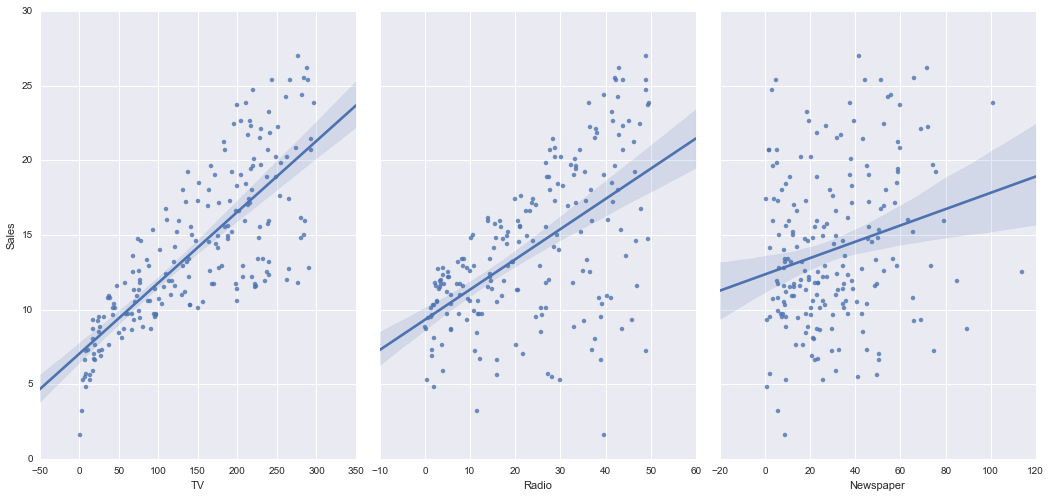

In [10]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Confidence in our Model

**Question:** Is linear regression a high variance/low bias model, or a low variance/high bias model?

**Answer:** Low variance/high bias. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [11]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [12]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

![R-squared](images/r_squared.png)

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [13]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.61187505085007099

In [14]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.61187505085007099

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's estimate these coefficients:

In [15]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [16]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print lm2.intercept_
print lm2.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [17]:
# pair the feature names with the coefficients
zip(feature_cols, lm2.coef_)

[('TV', 0.04576464545539765),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762799)]

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

In [18]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 16 Apr 2015   Prob (F-statistic):           1.58e-96
Time:                        13:54:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep features in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new features.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [19]:
### STATSMODELS ###

# only include TV and Radio in the model
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm1.rsquared

0.89719426108289557

In [20]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm1.rsquared

0.89721063817895219

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Train/test split** or **cross-validation.** They provide a more reliable estimate of out-of-sample error, and thus are better for choosing which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to **any model**, whereas the methods described above only apply to **linear models**.

## Model Evaluation Metrics for Regression

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's calculate these by hand, to get an intuitive sense for the results:

In [21]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print metrics.mean_absolute_error(y_true, y_pred)
print metrics.mean_squared_error(y_true, y_pred)
print np.sqrt(metrics.mean_squared_error(y_true, y_pred))

10.0
150.0
12.2474487139


MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

## Model Evaluation Using Train/Test Split

Let's use train/test split with RMSE to see whether Newspaper should be kept in the model:

In [22]:
# include Newspaper
X = data[['TV', 'Radio', 'Newspaper']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


In [23]:
# exclude Newspaper
X = data[['TV', 'Radio']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994


## Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [24]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [25]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **Size_large** feature:

In [26]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print coefficients
zip(feature_cols, lm2.coef_)

[('TV', 0.045719820924362803),
 ('Radio', 0.18872814313427874),
 ('Newspaper', -0.0010976794483515545),
 ('Size_large', 0.057423850854828061)]

How do we interpret the **Size_large coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'Size_small' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Features with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [27]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category. Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [28]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


However, we actually only need **two dummy variables, not three**. Why? Because two dummies captures all of the "information" about the Area feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [29]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

If this is confusing, think about why we only needed one dummy variable for Size (Size_large), not two dummy variables (Size_small and Size_large). In general, if you have a categorical feature with k "levels", you create k-1 dummy variables.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model:

In [30]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [31]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
zip(feature_cols, lm2.coef_)

[('TV', 0.04574401036331379),
 ('Radio', 0.18786669552525814),
 ('Newspaper', -0.0010876977267108706),
 ('Size_large', 0.077396607497479411),
 ('Area_suburban', -0.10656299015958708),
 ('Area_urban', 0.26813802165220019)]

How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming features to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).